In [1]:
########## Part B ##########
########## Question 1 - The market capitalization ##########

import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

# Input file path
file_path = "48_Industry_Portfolios.CSV"

# Step 1: Read data with proper missing value handling
df_firms = pd.read_csv(
    file_path, 
    skiprows=2587, 
    nrows=1182,
    na_values=[-99.99, -999]  # Handle both missing value indicators
)

df_size = pd.read_csv(
    file_path, 
    skiprows=3773, 
    nrows=1182,
    na_values=[-99.99, -999]  # Handle both missing value indicators
)

# Step 2: Process date format
df_firms.rename(columns={df_firms.columns[0]: 'Date'}, inplace=True)
df_size.rename(columns={df_size.columns[0]: 'Date'}, inplace=True)

df_firms['Date'] = pd.to_datetime(df_firms['Date'], format='%Y%m', errors='coerce')
df_size['Date'] = pd.to_datetime(df_size['Date'], format='%Y%m', errors='coerce')

# Step 3: Ensure numerical columns are converted to float type
numeric_cols = df_firms.columns.drop('Date')
for col in numeric_cols:
    df_firms[col] = pd.to_numeric(df_firms[col], errors='coerce')
    df_size[col] = pd.to_numeric(df_size[col], errors='coerce')

# Step 4: Set index for calculations
df_firms.set_index('Date', inplace=True)
df_size.set_index('Date', inplace=True)

# Step 5: No interpolation or filling of missing values
# Missing values will remain as NaN and not enter calculations

# Step 6: Compute market capitalization
df_market_cap = df_firms * df_size

# Ensure Date is PeriodIndex
df_market_cap.index = df_market_cap.index.to_period('M')  # Convert index to PeriodIndex

# Display data shape and time range
print(f"Market capitalization data shape: {df_market_cap.shape}")
print(f"Time range: {df_market_cap.index.min()} to {df_market_cap.index.max()}")
print(f"Number of missing values: {df_market_cap.isna().sum().sum()}")

# Display results
df_market_cap

Market capitalization data shape: (1182, 48)
Time range: 1926-07 to 2024-12
Number of missing values: 2400


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,299.40,1247.60,NaN,21.36,955.52,13.00,171.84,4.33,178.16,220.32,...,212.10,4977.87,2.38,1539.45,64.92,43.50,95.46,45.84,49.60,97.00
1926-08,306.18,1246.00,NaN,20.25,967.52,14.12,176.04,6.50,177.04,237.96,...,227.16,5058.17,1.80,1536.81,66.00,45.51,94.95,47.12,46.65,102.04
1926-09,313.02,1278.00,NaN,25.74,1024.48,16.50,174.60,9.29,169.44,231.48,...,220.92,5281.55,1.90,1521.63,65.64,50.91,97.38,48.94,46.80,108.84
1926-10,308.73,1288.40,NaN,26.76,1030.72,17.88,183.48,8.83,169.84,228.36,...,208.62,5269.14,1.76,1522.95,64.80,49.38,97.98,47.44,44.45,104.64
1926-11,307.02,1236.00,NaN,25.86,1041.28,17.62,174.06,9.31,161.12,228.36,...,196.80,5115.11,1.48,1485.99,61.98,43.56,93.78,44.66,43.95,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,44880.42,429966.50,364008.40,366745.94,266317.80,37403.86,469992.12,31125.00,700076.76,221826.30,...,76173.66,1001728.70,612178.50,4403786.40,715240.96,2955967.19,1897388.87,80933.56,1594860.00,1559522.88
2024-09,45887.28,450420.00,383597.76,369697.79,287486.58,36560.68,497920.56,31633.10,743215.56,234585.90,...,77018.49,1022689.02,604116.25,4431178.18,753160.65,3014625.58,1977556.46,81376.86,1607626.10,1655730.72
2024-10,47034.96,453750.50,384463.03,372284.66,277503.65,37779.04,519229.60,30838.80,750817.98,247426.80,...,79277.58,1047316.50,599328.24,4611681.46,791989.38,2948825.70,1952851.53,86188.68,1646844.28,1632512.40


In [2]:
########## Question 2 - The Book-to-Market ratio ##########

# Step 1: Read the "Sum of BE/Sum of ME" data
df_BM = pd.read_csv(
    file_path, 
    skiprows=4959, 
    nrows=99,
    na_values=[-99.99, -999]  # Handle both missing value indicators
)

# Rename the first column to 'Date'
df_BM.rename(columns={df_BM.columns[0]: 'Date'}, inplace=True)

# Step 2: No replacement of missing values with zeros
# Missing values will remain as NaN throughout the analysis

# Step 3: Create monthly data
monthly_data = []

# Iterate through annual data and populate B/M values for each month
for i in range(len(df_BM)):
    year = df_BM.loc[i, 'Date']
    bm_values = df_BM.iloc[i, 1:].values  # Extract B/M ratios excluding 'Date'
    
    # Use the current year's B/M values for July to December
    for month in range(7, 13):
        month_data = [f"{year}-{month:02d}"]
        month_data.extend(bm_values.tolist())
        monthly_data.append(month_data)
    
    # Use the current year's B/M values for January to June of the next year
    for month in range(1, 7):
        month_data = [f"{year+1}-{month:02d}"]
        month_data.extend(bm_values.tolist())
        monthly_data.append(month_data)

# Step 4: Create a monthly DataFrame
df_BM_monthly = pd.DataFrame(monthly_data, columns=['Date'] + list(df_BM.columns[1:]))

# Step 5: Ensure all columns are numeric, but don't fill missing values
for col in df_BM_monthly.columns[1:]:  # Skip the 'Date' column
    df_BM_monthly[col] = pd.to_numeric(df_BM_monthly[col], errors='coerce')

# Step 6: Convert the date format to a monthly period
df_BM_monthly['Date'] = pd.to_datetime(df_BM_monthly['Date'], errors='coerce')
df_BM_monthly['Date'] = df_BM_monthly['Date'].dt.to_period('M')
df_BM_monthly.set_index('Date', inplace=True)

# Step 7: Validate data integrity
print(f"Monthly B/M data shape: {df_BM_monthly.shape}")
print(f"Time range: {df_BM_monthly.index.min()} to {df_BM_monthly.index.max()}")
print(f"Number of missing values: {df_BM_monthly.isna().sum().sum()}")

# Display results
df_BM_monthly

Monthly B/M data shape: (1188, 48)
Time range: 1926-07 to 2025-06
Number of missing values: 2424


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.65,0.63,NaN,2.54,0.79,1.99,0.81,4.34,0.38,0.90,...,0.97,1.41,2.35,0.44,0.66,0.66,0.62,0.88,0.89,0.63
1926-08,0.65,0.63,NaN,2.54,0.79,1.99,0.81,4.34,0.38,0.90,...,0.97,1.41,2.35,0.44,0.66,0.66,0.62,0.88,0.89,0.63
1926-09,0.65,0.63,NaN,2.54,0.79,1.99,0.81,4.34,0.38,0.90,...,0.97,1.41,2.35,0.44,0.66,0.66,0.62,0.88,0.89,0.63
1926-10,0.65,0.63,NaN,2.54,0.79,1.99,0.81,4.34,0.38,0.90,...,0.97,1.41,2.35,0.44,0.66,0.66,0.62,0.88,0.89,0.63
1926-11,0.65,0.63,NaN,2.54,0.79,1.99,0.81,4.34,0.38,0.90,...,0.97,1.41,2.35,0.44,0.66,0.66,0.62,0.88,0.89,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02,0.68,0.49,0.1,0.20,0.18,0.36,0.14,0.43,0.15,0.22,...,0.33,0.23,0.26,0.12,0.16,0.66,0.37,0.43,0.35,0.45
2025-03,0.68,0.49,0.1,0.20,0.18,0.36,0.14,0.43,0.15,0.22,...,0.33,0.23,0.26,0.12,0.16,0.66,0.37,0.43,0.35,0.45
2025-04,0.68,0.49,0.1,0.20,0.18,0.36,0.14,0.43,0.15,0.22,...,0.33,0.23,0.26,0.12,0.16,0.66,0.37,0.43,0.35,0.45


In [3]:
########## Question 3 - The Momentum ##########

# Step 1: Read "Average Value Weighted Returns -- Monthly" and process data efficiently
df_return = pd.read_csv(
    file_path, 
    skiprows=11, 
    nrows=1182,
    na_values=[-99.99, -999]  # Handle missing values during import
)

# Step 2: Data cleaning and formatting
# Rename the date column and convert it to date format
df_return.rename(columns={df_return.columns[0]: 'Date'}, inplace=True)
df_return['Date'] = pd.to_datetime(df_return['Date'], format='%Y%m', errors='coerce')

# Ensure all columns are numeric
numeric_cols = df_return.columns.drop('Date')
for col in numeric_cols:
    df_return[col] = pd.to_numeric(df_return[col], errors='coerce')

# Check for and fill missing values
missing_count = df_return.isna().sum().sum()
if missing_count > 0:
    print(f"Processed {missing_count} missing values")
    df_return.fillna(0, inplace=True)

# Step 3: Sort by date to ensure correct rolling average calculations
df_return.sort_values(by='Date', inplace=True)

# Step 4: Efficiently compute the 12-month rolling average return (industry momentum)
# Set date as index for performance optimization
df_return.set_index('Date', inplace=True)

# Compute rolling average
df_momentum = df_return.rolling(window=12, min_periods=12).mean()

# Reset index and convert date to monthly period
df_momentum.index = df_momentum.index.to_period('M')

# Step 5: Validate data integrity
print(f"Momentum data shape: {df_momentum.shape}")
print(f"Time range: {df_momentum.index.min()} to {df_momentum.index.max()}") 
print(f"Valid data starts from: {df_momentum.index[df_momentum.notna().any(axis=1)].min()}")
print(f"Number of rows containing NaN: {df_momentum.iloc[:,1:].isna().any(axis=1).sum()}")

# Display results
df_momentum

Processed 2400 missing values
Momentum data shape: (1182, 48)
Time range: 1926-07 to 2024-12
Valid data starts from: 1927-06
Number of rows containing NaN: 11


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,1.801667,0.454167,1.231667,-0.335833,2.620833,-0.441667,2.371667,1.851667,1.003333,-0.075833,...,2.010000,1.155000,1.555833,2.253333,0.927500,2.925000,2.440833,1.892500,2.455833,2.653333
2024-09,1.961667,0.890000,1.831667,0.201667,2.714167,0.455000,3.662500,2.173333,1.658333,0.771667,...,2.496667,1.746667,1.720000,3.105000,1.750833,3.085000,2.142500,3.262500,2.962500,2.767500
2024-10,2.813333,0.948333,1.223333,0.134167,3.752500,1.670833,3.764167,2.395000,1.178333,-0.089167,...,2.484167,2.421667,1.663333,2.970833,1.840000,3.752500,1.492500,4.074167,4.036667,2.690833


In [4]:
import statsmodels.api as sm
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

########## Question 4 - The Market Beta ##########

# Step 1: Import daily data
file_path_return = "48_Industry_Portfolios_Daily.CSV"
file_path_factor = "F-F_Research_Data_Factors_daily.CSV"

# Efficient data reading function
def read_financial_data(file_path, skiprows, nrows, date_format='%Y%m%d'):
    """Read financial data more efficiently"""
    df = pd.read_csv(file_path, skiprows=skiprows, nrows=nrows, na_values=[-99.99, -999])
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')
    
    # Convert all columns to numeric type
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Read industry return data
print(f"Starting data reading: {datetime.now().strftime('%H:%M:%S')}")
df_return_daily = read_financial_data(file_path_return, skiprows=9, nrows=25901)

# Read Fama-French factor data
df_factor = read_financial_data(file_path_factor, skiprows=3, nrows=25901)
print(f"Data reading completed: {datetime.now().strftime('%H:%M:%S')}")

# Step 2: Merge datasets and calculate excess returns
print(f"Starting data processing: {datetime.now().strftime('%H:%M:%S')}")
# Efficient merging
df_excess_return = pd.merge(
    df_return_daily, 
    df_factor[['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']], 
    on='Date', 
    how='inner'
)

# Compute excess returns
industry_cols = df_return_daily.columns[1:]
for col in industry_cols:
    df_excess_return[col] = df_excess_return[col] - df_excess_return['RF']

# Step 3: Add month column and set index
df_excess_return['Month'] = df_excess_return['Date'].dt.to_period('M')
df_excess_return.set_index('Date', inplace=True)
print(f"Data processing completed: {datetime.now().strftime('%H:%M:%S')}")

# Step 4: Efficient computation of 12-month rolling beta values
print(f"Starting beta calculation: {datetime.now().strftime('%H:%M:%S')}")
all_months = sorted(df_excess_return['Month'].unique())
start_month_idx = 11  # Start from the 12th month

# Preallocate result list
rolling_beta_list = []
total_months = len(all_months) - start_month_idx
industry_count = len(industry_cols)
estimated_size = total_months * industry_count

# Pre-create a sufficiently large list
rolling_beta_list = [None] * estimated_size
idx = 0

# Optimized loop for rolling regression
for month_idx in range(start_month_idx, len(all_months)):
    # Get the current month and the previous 11 months
    current_month = all_months[month_idx]
    past_months = all_months[(month_idx-11):month_idx+1]
    
    # Extract rolling window data
    rolling_window = df_excess_return[df_excess_return['Month'].isin(past_months)]
    
    # Set X as market factor (excess return of market)
    X = rolling_window['Mkt-RF'] 
    
    # Perform regression for each industry using industry excess return as Y
    for col in industry_cols:
        Y = rolling_window[col]
        
        # Check if there are enough valid observations (ignore NaN)
        valid_data = ~(X.isna() | Y.isna())
        if valid_data.sum() >= 20:  # At least 20 valid observations required
            X_with_const = sm.add_constant(X[valid_data])
            Y_valid = Y[valid_data]
            
            try:
                model = sm.OLS(Y_valid, X_with_const).fit()
                rolling_beta_list[idx] = {
                    "Month": current_month, 
                    "Industry": col, 
                    "Beta": model.params['Mkt-RF']  # Use coefficient of 'Mkt-RF' as beta
                }
                idx += 1
            except:
                # If regression fails, record as NaN
                rolling_beta_list[idx] = {
                    "Month": current_month, 
                    "Industry": col, 
                    "Beta": np.nan
                }
                idx += 1
        else:
            # Insufficient data, record as NaN
            rolling_beta_list[idx] = {
                "Month": current_month, 
                "Industry": col, 
                "Beta": np.nan
            }
            idx += 1

# Clean up the list and convert to DataFrame
rolling_beta_list = [item for item in rolling_beta_list[:idx] if item is not None]
print(f"Beta calculation completed: {datetime.now().strftime('%H:%M:%S')}")

# Step 5: Construct the final result table
print(f"Starting result table construction: {datetime.now().strftime('%H:%M:%S')}")
df_rolling_beta = pd.DataFrame(rolling_beta_list)

# Convert to pivot table with 'Month' as the index and remove the pivot table's column name
df_beta_pivot = df_rolling_beta.pivot(index='Month', columns='Industry', values='Beta')
df_beta_pivot.columns.name = None
df_beta_pivot = df_beta_pivot.rename_axis("Date") 

# Ensure column order matches the original industry order
df_market_beta = df_beta_pivot[industry_cols].copy()

# Validate results
print(f"Market beta data shape: {df_market_beta.shape}")
print(f"Time range: {df_market_beta.index.min()} to {df_market_beta.index.max()}")
print(f"Number of missing values: {df_market_beta.isna().sum().sum()}")
print(f"Result table construction completed: {datetime.now().strftime('%H:%M:%S')}")

# Display results
df_market_beta

Starting data reading: 18:14:54
Data reading completed: 18:14:54
Starting data processing: 18:14:54
Data processing completed: 18:14:54
Starting beta calculation: 18:14:54
Beta calculation completed: 18:15:16
Starting result table construction: 18:15:16
Market beta data shape: (1171, 48)
Time range: 1927-06 to 2024-12
Number of missing values: 2301
Result table construction completed: 18:15:16


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1927-06,0.526106,0.880882,NaN,1.414694,0.511579,0.399385,0.986791,1.221144,0.930041,0.114654,...,1.605134,1.027618,-0.046360,1.107862,0.542514,0.534692,0.352776,0.599939,1.005942,1.348132
1927-07,0.518523,0.889586,NaN,1.401124,0.516609,0.537589,0.997804,1.064607,0.920426,0.100562,...,1.592613,1.046647,0.068194,1.122539,0.528089,0.540188,0.426434,0.643228,0.998216,1.273091
1927-08,0.539648,0.900011,NaN,1.541087,0.507852,0.535973,1.056396,0.961648,1.008210,0.148567,...,1.622801,1.047660,0.390746,1.180129,0.605387,0.433546,0.475636,0.654324,1.020063,1.192006
1927-09,0.588654,0.919206,NaN,1.528370,0.493481,0.402041,1.046980,0.897352,0.992671,0.244737,...,1.526024,1.030738,0.563074,1.183786,0.590478,0.389351,0.479125,0.616430,1.126928,1.118174
1927-10,0.562545,0.898173,NaN,1.516063,0.434533,0.186273,1.056610,0.644699,0.930683,0.202234,...,1.349706,1.006038,1.263462,1.225632,0.638825,0.293876,0.532409,0.516626,1.174366,0.879379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,0.800123,0.253290,0.286244,0.274135,0.363715,1.128083,1.044285,0.942617,0.333124,1.062394,...,0.756631,1.014173,0.671462,1.068501,0.779042,0.856183,0.298565,1.305043,0.983403,0.589540
2024-09,0.827343,0.207678,0.217351,0.196824,0.272866,1.123790,1.052802,0.950731,0.256033,1.020046,...,0.714579,0.982883,0.670188,1.023758,0.764151,0.849203,0.279803,1.261966,0.982837,0.577165
2024-10,0.854987,0.198558,0.196736,0.162062,0.179206,1.000245,1.072918,0.897183,0.263882,1.016407,...,0.706806,0.954876,0.672236,1.004890,0.772322,0.846585,0.298419,1.226515,0.963549,0.564228


In [5]:
########## Question 5 - The Idiosyncratic Volatility ##########

print(f"Starting idiosyncratic volatility calculation: {datetime.now().strftime('%H:%M:%S')}")

# Step 1: Define industry columns and prepare data structures
industry_cols = df_return_daily.columns[1:]  # Use the same industry columns as in Question 4
all_months = sorted(df_excess_return['Month'].unique())
start_month_idx = 11  # Start from the 12th month

# Preallocate result list
idio_vol_list = []
total_months = len(all_months) - start_month_idx
industry_count = len(industry_cols)
estimated_size = total_months * industry_count

# Pre-create a sufficiently large list
idio_vol_list = [None] * estimated_size
idx = 0

# Step 2: Compute 12-month rolling idiosyncratic volatility
for month_idx in range(start_month_idx, len(all_months)):
    # Get the current month and the previous 11 months
    current_month = all_months[month_idx]
    past_months = all_months[(month_idx-11):month_idx+1]
    
    # Extract rolling window data
    rolling_window = df_excess_return[df_excess_return['Month'].isin(past_months)]
    
    # Preprocess factor data
    X_factors = rolling_window[['Mkt-RF', 'SMB', 'HML']].astype(float)
    
    # Process all industries
    for col in industry_cols:
        # Dependent variable: industry excess returns
        Y = rolling_window[col].astype(float)
        
        # Check for missing values
        valid_data = ~(X_factors.isna().any(axis=1) | Y.isna())
        if valid_data.sum() >= 20:  # At least 20 valid observations required
            try:
                # Add constant to X with valid data only
                X_with_const = sm.add_constant(X_factors[valid_data])
                Y_valid = Y[valid_data]
                
                # Run regression model
                model = sm.OLS(Y_valid, X_with_const).fit()
                residuals = model.resid
                
                # Compute sample standard deviation (ddof=1) as idiosyncratic volatility
                idio_vol = np.std(residuals, ddof=1)
                
                # Store result
                idio_vol_list[idx] = {
                    "Month": current_month, 
                    "Industry": col, 
                    "IdioVol": idio_vol
                }
                idx += 1
            except Exception as e:
                # Log error but continue processing
                print(f"Error processing industry {col} in {current_month}: {str(e)}")
                idio_vol_list[idx] = {
                    "Month": current_month, 
                    "Industry": col, 
                    "IdioVol": np.nan
                }
                idx += 1
        else:
            # Insufficient data or missing values, record as NaN
            idio_vol_list[idx] = {
                "Month": current_month, 
                "Industry": col, 
                "IdioVol": np.nan
            }
            idx += 1

# Clean up the list and convert to DataFrame
idio_vol_list = [item for item in idio_vol_list[:idx] if item is not None]
print(f"Idiosyncratic volatility calculation completed: {datetime.now().strftime('%H:%M:%S')}")

# Step 3: Construct the final result table
print(f"Starting result table construction: {datetime.now().strftime('%H:%M:%S')}")

# Convert to DataFrame
df_idio_vol = pd.DataFrame(idio_vol_list)

# Convert to pivot table
df_idio_vol_pivot = df_idio_vol.pivot(index='Month', columns='Industry', values='IdioVol')
df_idio_vol_pivot.columns.name = None
df_idio_vol_pivot = df_idio_vol_pivot.rename_axis("Date") 

# Ensure column order matches the original industry order
df_idio_vol = df_idio_vol_pivot[industry_cols].copy()

# Validate results
print(f"Idiosyncratic volatility data shape: {df_idio_vol.shape}")
print(f"Time range: {df_idio_vol.index.min()} to {df_idio_vol.index.max()}")
print(f"Number of missing values: {df_idio_vol.isna().sum().sum()}")
print(f"Result table construction completed: {datetime.now().strftime('%H:%M:%S')}")

# Display results
df_idio_vol

Starting idiosyncratic volatility calculation: 18:15:16
Idiosyncratic volatility calculation completed: 18:15:45
Starting result table construction: 18:15:45
Idiosyncratic volatility data shape: (1171, 48)
Time range: 1927-06 to 2024-12
Number of missing values: 2301
Result table construction completed: 18:15:45


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1927-06,0.849599,0.381942,NaN,1.593735,0.489935,2.123575,0.651679,2.559449,0.650924,0.843279,...,0.898247,0.261717,4.524684,0.480565,0.656857,1.546268,0.763849,1.167379,1.032805,1.132926
1927-07,0.823495,0.365732,NaN,1.613635,0.506809,2.096240,0.685202,2.277157,0.653991,0.798248,...,0.870276,0.256514,4.423655,0.484591,0.674384,1.556384,0.839145,1.166818,1.014023,1.105891
1927-08,0.828173,0.368142,NaN,1.466425,0.495152,1.913584,0.720402,1.966503,0.657674,0.760028,...,0.880220,0.249672,4.305620,0.495665,0.679550,1.438555,0.844347,1.173847,1.018924,1.080858
1927-09,0.845924,0.376326,NaN,1.472554,0.503131,1.800658,0.701107,1.761368,0.636699,0.777455,...,0.886022,0.252441,4.163618,0.502278,0.682277,1.591623,0.900342,1.163887,1.111531,1.084744
1927-10,0.801008,0.387911,NaN,1.389484,0.505938,1.781297,0.707877,1.678071,0.631871,0.772877,...,0.883074,0.251999,4.084514,0.478440,0.739416,1.576974,0.951513,1.116466,1.096457,1.081339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,1.472513,0.801122,0.793953,0.902126,0.859881,0.927536,1.025595,0.715123,0.774638,1.252110,...,0.795487,0.631421,0.513669,0.594193,0.647362,0.405065,0.710127,0.817884,0.480417,0.486339
2024-09,1.459503,0.797914,0.802797,0.908393,0.880081,0.922900,1.016491,0.709217,0.779193,1.255411,...,0.785646,0.662015,0.526868,0.594836,0.645472,0.428872,0.708368,0.797451,0.481357,0.486567
2024-10,1.448285,0.735226,0.726777,0.833390,0.964024,0.848038,0.944899,0.706801,0.761425,1.253089,...,0.732609,0.648120,0.542413,0.564003,0.634183,0.434612,0.723322,0.863522,0.478836,0.504715


In [6]:
df_return.index = df_return.index.to_period('M')  # Convert DatetimeIndex to PeriodIndex

# Check whether all tables have a consistent format

table = {
    "df_market_cap": df_market_cap,
    "df_BM_monthly": df_BM_monthly,
    "df_momentum": df_momentum,
    "df_market_beta": df_market_beta,
    "df_idio_vol": df_idio_vol,
    "df_return": df_return
}

# Check if data types are consistent across DataFrames**
print("📌 Checking data types for each DataFrame:")
for name, df in table.items():
    print(f"\n{name}:")
    print(df.dtypes)

# Check if column names are consistent across DataFrames**
column_sets = {name: set(df.columns) for name, df in table.items()}

print("\n📌 Checking if all DataFrames have the same columns:")
columns_reference = column_sets["df_market_cap"]  # Use df_market_cap as the reference DataFrame
for name, columns in column_sets.items():
    if columns != columns_reference:
        print(f"❌ {name} has different columns!")
    else:
        print(f"✅ {name} has the same columns.")

# Check if index types are consistent across DataFrames**
print("\n📌 Checking index type for each DataFrame:")
for name, df in table.items():
    print(f"{name}: {type(df.index)}")

# Check and replace missing values (NaN, -99.99, -999) with 0**
print("\n📌 Checking for missing values and replacing them with 0:")
for name, df in table.items():
    missing_values = ((df.isna()) | (df == -99.99) | (df == -999)).sum().sum()
    if missing_values > 0:
        print(f"{name}: {missing_values} missing values found!.")
    else:
        print(f"{name}: No missing values.")

# Check if DataFrame shapes are consistent**
print("\n📌 Checking shape of each DataFrame:")
for name, df in table.items():
    print(f"{name}: {df.shape}")

📌 Checking data types for each DataFrame:

df_market_cap:
Agric    float64
Food     float64
Soda     float64
Beer     float64
Smoke    float64
Toys     float64
Fun      float64
Books    float64
Hshld    float64
Clths    float64
Hlth     float64
MedEq    float64
Drugs    float64
Chems    float64
Rubbr    float64
Txtls    float64
BldMt    float64
Cnstr    float64
Steel    float64
FabPr    float64
Mach     float64
ElcEq    float64
Autos    float64
Aero     float64
Ships    float64
Guns     float64
Gold     float64
Mines    float64
Coal     float64
Oil      float64
Util     float64
Telcm    float64
PerSv    float64
BusSv    float64
Comps    float64
Chips    float64
LabEq    float64
Paper    float64
Boxes    float64
Trans    float64
Whlsl    float64
Rtail    float64
Meals    float64
Banks    float64
Insur    float64
RlEst    float64
Fin      float64
Other    float64
dtype: object

df_BM_monthly:
Agric    float64
Food     float64
Soda     float64
Beer     float64
Smoke    float64
Toys     fl

In [7]:
def construct_long_short_portfolio(
    df_char: pd.DataFrame,
    df_returns: pd.DataFrame,
    df_market_cap: pd.DataFrame = None,
    top_n: int = 5,
    bottom_n: int = 5,
    weighting: str = 'equal',
    print_assets: bool = True
) -> pd.DataFrame:
    """
    Construct a long-short portfolio based on characteristic sorting.
    Sort assets based on characteristics at month t,
    then use the returns of those assets at month t+1.
    """
    
    # 1. Make copies to avoid altering the original data
    df_char = df_char.copy()
    df_returns = df_returns.copy()
    
    # Ensure the DataFrames have PeriodIndex
    if not isinstance(df_char.index, pd.PeriodIndex):
        raise ValueError("df_char must have a PeriodIndex.")
    if not isinstance(df_returns.index, pd.PeriodIndex):
        raise ValueError("df_returns must have a PeriodIndex.")
    
    # 2. No need to merge at the beginning, as we'll be using different time periods
    
    # Identify all dates in both dataframes
    all_dates = sorted(set(df_char.index) & set(df_returns.index))
    
    # We need to ensure we have t+1 returns available
    valid_dates = [date_ for date_ in all_dates[:-1] if all_dates[all_dates.index(date_) + 1] == date_ + 1]
    
    ls_results = []
    asset_selections = []
    
    # 3. For each valid date t where we also have t+1 data
    for date_t in valid_dates:
        date_t_plus_1 = date_t + 1
        
        # Get characteristic data at time t
        if date_t not in df_char.index:
            continue
        char_data_t = df_char.loc[date_t]
        
        # Get return data at time t+1
        if date_t_plus_1 not in df_returns.index:
            continue
        ret_data_t_plus_1 = df_returns.loc[date_t_plus_1]
        
        # Get market cap data at time t (if needed)
        if weighting == 'mcw':
            if df_market_cap is None:
                raise ValueError("You must provide df_market_cap when weighting='mcw'.")
            if date_t not in df_market_cap.index:
                continue
            cap_data_t = df_market_cap.loc[date_t]
        
        # Filter out NaN characteristic values
        char_data_filtered = char_data_t.dropna()

        # If all data are missing, skip and record LS_Return as NaN
        if len(char_data_filtered) == 0:
            ls_results.append({
                'Date': date_t_plus_1,
                'LS_Return': np.nan
            })
            continue
        
        # 4. Sort industries by characteristic at time t (descending)
        sorted_industries = char_data_filtered.sort_values(ascending=False)
        
        # 5. Select top_n and bottom_n industries at time t
        top_industries = sorted_industries.index[:top_n]
        bottom_industries = sorted_industries.index[-bottom_n:]
        
        # Record selected assets
        asset_selections.append({
            'Date': date_t,
            'Long_Assets': list(top_industries),
            'Long_Characteristic_Values': {ind: char_data_t[ind] for ind in top_industries},
            'Short_Assets': list(bottom_industries),
            'Short_Characteristic_Values': {ind: char_data_t[ind] for ind in bottom_industries}
        })
        
        # 6. Get the corresponding returns for these industries at time t+1
        valid_top_industries = [ind for ind in top_industries if ind in ret_data_t_plus_1.index]
        valid_bottom_industries = [ind for ind in bottom_industries if ind in ret_data_t_plus_1.index]
        
        top_returns = ret_data_t_plus_1[valid_top_industries]
        bottom_returns = ret_data_t_plus_1[valid_bottom_industries]
        
        # Compute portfolio returns
        if weighting == 'equal':
            # Equal-weighted returns
            r_long = top_returns.mean() if len(top_returns) > 0 else np.nan
            r_short = bottom_returns.mean() if len(bottom_returns) > 0 else np.nan
        else:  # weighting == 'mcw'
            # Market-cap weighted
            # Filter cap data to ensure it's valid
            cap_data_filtered = cap_data_t.dropna()
            
            # Find intersection of valid industries with returns and with market cap
            valid_top_with_cap = [ind for ind in valid_top_industries if ind in cap_data_filtered.index]
            valid_bottom_with_cap = [ind for ind in valid_bottom_industries if ind in cap_data_filtered.index]
            
            if len(valid_top_with_cap) > 0:
                top_cap = cap_data_filtered[valid_top_with_cap]
                top_returns_with_cap = ret_data_t_plus_1[valid_top_with_cap]
                sum_top_cap = top_cap.sum()
                r_long = (top_returns_with_cap * top_cap).sum() / sum_top_cap if sum_top_cap > 0 else np.nan
            else:
                r_long = np.nan
                
            if len(valid_bottom_with_cap) > 0:
                bottom_cap = cap_data_filtered[valid_bottom_with_cap]
                bottom_returns_with_cap = ret_data_t_plus_1[valid_bottom_with_cap]
                sum_bottom_cap = bottom_cap.sum()
                r_short = (bottom_returns_with_cap * bottom_cap).sum() / sum_bottom_cap if sum_bottom_cap > 0 else np.nan
            else:
                r_short = np.nan
        
        # Calculate long-short return for time t+1
        ls_ret = r_long - r_short
        
        ls_results.append({
            'Date': date_t_plus_1,
            'LS_Return': ls_ret
        })
    
    # Print selected assets if requested
    #if print_assets:
    #    print("\n===== Long-Short Portfolio Asset Selections =====")
    #    for selection in asset_selections:
    #        print(f"\nDate: {selection['Date']}")
            
    #        print("Long Assets (high characteristic values):")
    #        for ind in selection['Long_Assets']:
    #            char_val = selection['Long_Characteristic_Values'].get(ind, np.nan)
    #            print(f"  - {ind}: characteristic={char_val:.4f}")
            
    #        print("Short Assets (low characteristic values):")
    #        for ind in selection['Short_Assets']:
    #            char_val = selection['Short_Characteristic_Values'].get(ind, np.nan)
    #            print(f"  - {ind}: characteristic={char_val:.4f}")
    
    # Create the final result DataFrame
    df_ls = pd.DataFrame(ls_results).set_index('Date').sort_index()
    return df_ls

In [8]:
df_market_cap_equal = construct_long_short_portfolio(
    df_char=df_market_cap,
    df_returns=df_return,
    top_n=5,
    bottom_n=5,
    weighting='equal'
)
df_market_cap_equal

,LS_Return
Date,
1926-08,-9.772
1926-09,5.342
1926-10,3.562
1926-11,-0.126
1926-12,0.814
...,...
2024-08,7.114
2024-09,-0.896
2024-10,3.996


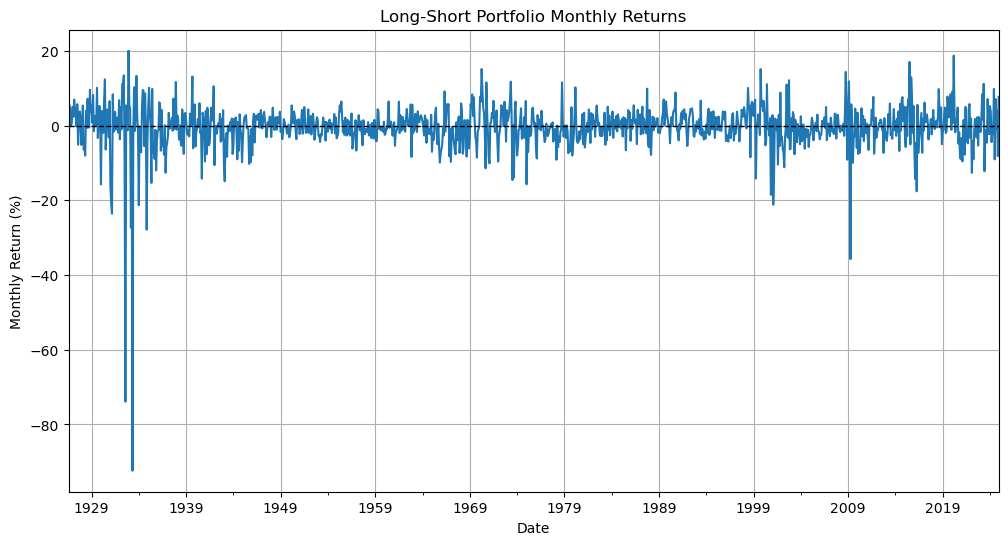

In [9]:
# Plot monthly returns
df_market_cap_equal.plot(
    y='LS_Return', 
    figsize=(12, 6), 
    title='Long-Short Portfolio Monthly Returns', 
    grid=True, 
    legend=False
)

# Add a reference line at 0
import matplotlib.pyplot as plt
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Monthly Return (%)')
plt.show()

In [10]:
df_BM_equal = construct_long_short_portfolio(
    df_char=df_BM_monthly,
    df_returns=df_return,
    top_n=5,
    bottom_n=5,
    weighting='equal'
)
df_BM_equal

,LS_Return
Date,
1926-08,20.420
1926-09,1.834
1926-10,2.408
1926-11,-2.652
1926-12,-1.766
...,...
2024-08,-3.958
2024-09,-0.670
2024-10,1.180


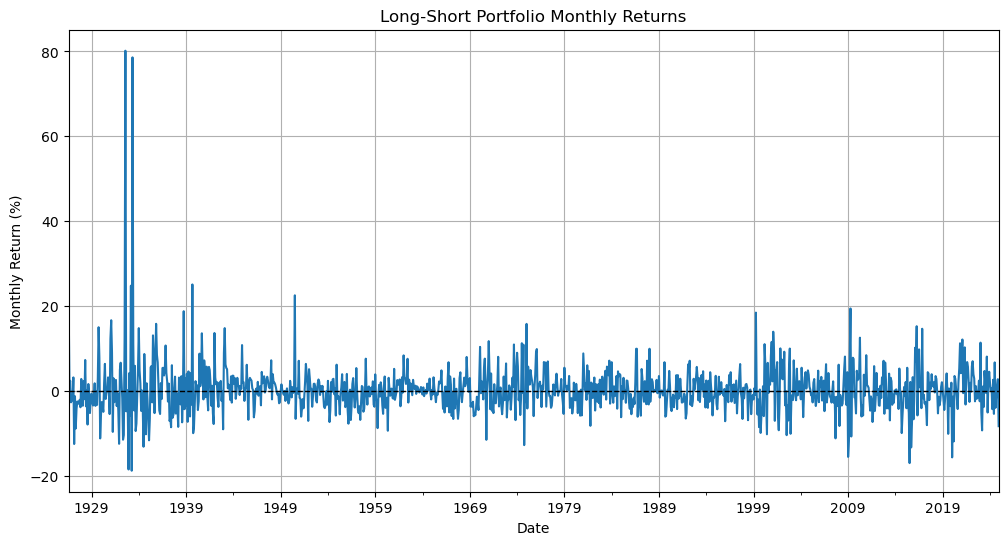

In [11]:
# Plot monthly returns
df_BM_equal.plot(
    y='LS_Return', 
    figsize=(12, 6), 
    title='Long-Short Portfolio Monthly Returns', 
    grid=True, 
    legend=False
)

# Add a reference line at 0
import matplotlib.pyplot as plt
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Monthly Return (%)')
plt.show()

In [12]:
df_momentum_equal = construct_long_short_portfolio(
    df_char=df_momentum,
    df_returns=df_return,
    top_n=5,
    bottom_n=5,
    weighting='equal'
)
df_momentum_equal

,LS_Return
Date,
1926-08,NaN
1926-09,NaN
1926-10,NaN
1926-11,NaN
1926-12,NaN
...,...
2024-08,-2.022
2024-09,-2.518
2024-10,-6.114


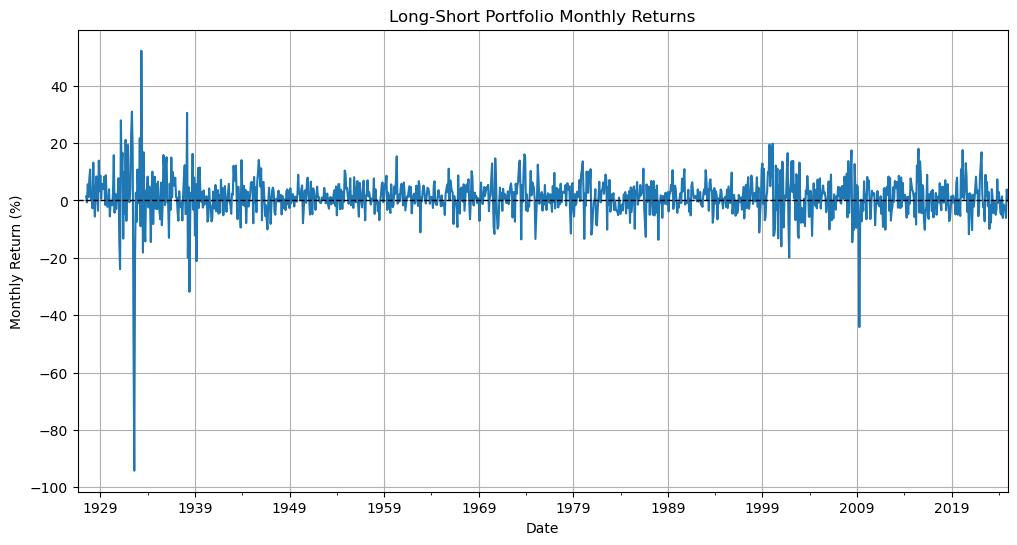

In [13]:
# Plot monthly returns
df_momentum_equal.plot(
    y='LS_Return', 
    figsize=(12, 6), 
    title='Long-Short Portfolio Monthly Returns', 
    grid=True, 
    legend=False
)

# Add a reference line at 0
import matplotlib.pyplot as plt
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Monthly Return (%)')
plt.show()

In [14]:
df_market_beta_equal = construct_long_short_portfolio(
    df_char=df_market_beta,
    df_returns=df_return,
    top_n=5,
    bottom_n=5,
    weighting='equal'
)
df_market_beta_equal

,LS_Return
Date,
1927-07,3.592
1927-08,0.942
1927-09,2.480
1927-10,-6.374
1927-11,10.462
...,...
2024-08,-6.766
2024-09,3.608
2024-10,3.504


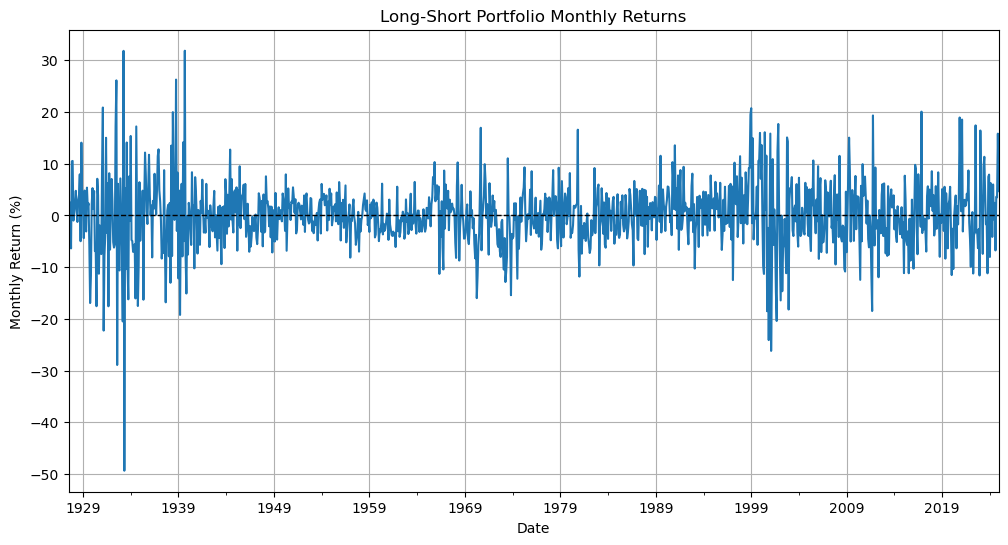

In [15]:
# Plot monthly returns
df_market_beta_equal.plot(
    y='LS_Return', 
    figsize=(12, 6), 
    title='Long-Short Portfolio Monthly Returns', 
    grid=True, 
    legend=False
)

# Add a reference line at 0
import matplotlib.pyplot as plt
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Monthly Return (%)')
plt.show()

In [16]:
df_idio_vol_equal = construct_long_short_portfolio(
    df_char=df_idio_vol,
    df_returns=df_return,
    top_n=5,
    bottom_n=5,
    weighting='equal'
)
df_idio_vol_equal

,LS_Return
Date,
1927-07,-4.108
1927-08,5.982
1927-09,-1.058
1927-10,-4.258
1927-11,-2.858
...,...
2024-08,-5.260
2024-09,4.778
2024-10,-4.242


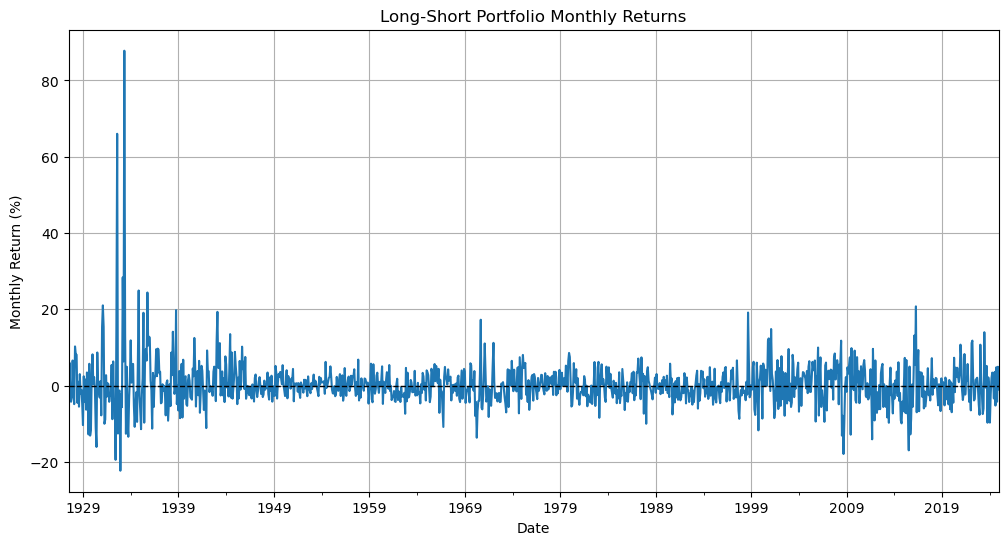

In [17]:
# Plot monthly returns
df_idio_vol_equal.plot(
    y='LS_Return', 
    figsize=(12, 6), 
    title='Long-Short Portfolio Monthly Returns', 
    grid=True, 
    legend=False
)

# Add a reference line at 0
import matplotlib.pyplot as plt
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Monthly Return (%)')
plt.show()

In [18]:
# Market cap weighted portfolio for the market cap characteristic
df_market_cap_weighted = construct_long_short_portfolio(
    df_char=df_market_cap,       # characteristic table for market cap
    df_returns=df_return,        # corresponding returns table
    df_market_cap=df_market_cap, # market cap data used for weighting
    top_n=5,
    bottom_n=5,
    weighting='mcw'
)
df_market_cap_weighted

,LS_Return
Date,
1926-08,-7.148225
1926-09,2.614067
1926-10,1.577082
1926-11,0.665044
1926-12,2.005850
...,...
2024-08,5.045778
2024-09,0.381512
2024-10,2.337046


In [19]:
# Market cap weighted portfolio for the BM (book-to-market) characteristic
df_BM_weighted = construct_long_short_portfolio(
    df_char=df_BM_monthly,       # characteristic table for BM
    df_returns=df_return,
    df_market_cap=df_market_cap, # use the same market cap data for weighting
    top_n=5,
    bottom_n=5,
    weighting='mcw'
)
df_BM_weighted

,LS_Return
Date,
1926-08,12.726653
1926-09,2.868337
1926-10,3.583751
1926-11,-2.477318
1926-12,3.161848
...,...
2024-08,0.244796
2024-09,-3.076603
2024-10,4.476450


In [20]:
# Market cap weighted portfolio for the momentum characteristic
df_momentum_weighted = construct_long_short_portfolio(
    df_char=df_momentum,         # characteristic table for momentum
    df_returns=df_return,
    df_market_cap=df_market_cap,
    top_n=5,
    bottom_n=5,
    weighting='mcw'
)
df_momentum_weighted

,LS_Return
Date,
1926-08,NaN
1926-09,NaN
1926-10,NaN
1926-11,NaN
1926-12,NaN
...,...
2024-08,2.293459
2024-09,-7.951239
2024-10,1.758990


In [21]:
# Market cap weighted portfolio for the market beta characteristic
df_market_beta_weighted = construct_long_short_portfolio(
    df_char=df_market_beta,      # characteristic table for market beta
    df_returns=df_return,
    df_market_cap=df_market_cap,
    top_n=5,
    bottom_n=5,
    weighting='mcw'
)
df_market_beta_weighted

,LS_Return
Date,
1927-07,10.282241
1927-08,4.787250
1927-09,-0.196544
1927-10,-12.422077
1927-11,1.956422
...,...
2024-08,-0.281646
2024-09,3.466868
2024-10,5.859703


In [22]:
df_idio_vol_weighted = construct_long_short_portfolio(
    df_char=df_idio_vol,         
    df_returns=df_return,      
    df_market_cap=df_market_cap,
    top_n=5,
    bottom_n=5,
    weighting='mcw'
)
df_idio_vol_weighted

,LS_Return
Date,
1927-07,-5.859551
1927-08,6.571302
1927-09,-1.909994
1927-10,-1.719029
1927-11,-1.381013
...,...
2024-08,-6.444153
2024-09,11.356744
2024-10,-4.285755


In [74]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# =========================================================
# Read and prepare Fama-French 3-factor and 5-factor data
# =========================================================

file_path_3factor = "F-F_Research_Data_Factors.CSV"
file_path_4factor = "F-F_Momentum_Factor.CSV"
file_path_5factor = "F-F_Research_Data_5_Factors_2x3.CSV"

# Read 3-factor data
df_3factor = pd.read_csv(file_path_3factor, skiprows=3, nrows=1182)
df_3factor.rename(columns={df_3factor.columns[0]: 'Date'}, inplace=True)
df_3factor['Date'] = pd.to_datetime(df_3factor['Date'], format='%Y%m', errors='coerce')
df_3factor.set_index('Date', inplace=True)
df_3factor.index = df_3factor.index.to_period('M')

# Read 4-factor data
df_4factor = pd.read_csv(file_path_4factor, skiprows=13, nrows=1176)
df_4factor.rename(columns={df_4factor.columns[0]: 'Date'}, inplace=True)
df_4factor['Date'] = pd.to_datetime(df_4factor['Date'], format='%Y%m', errors='coerce')
df_4factor.set_index('Date', inplace=True)
df_4factor.index = df_4factor.index.to_period('M')
df_4factor = pd.merge(df_3factor, df_4factor, on='Date', how='inner')
cols = [col for col in df_4factor.columns if col != 'RF'] + ['RF']
df_4factor = df_4factor[cols]

# Read 5-factor data
df_5factor = pd.read_csv(file_path_5factor, skiprows=3, nrows=738)
df_5factor.rename(columns={df_5factor.columns[0]: 'Date'}, inplace=True)
df_5factor['Date'] = pd.to_datetime(df_5factor['Date'], format='%Y%m', errors='coerce')
df_5factor.set_index('Date', inplace=True)
df_5factor.index = df_5factor.index.to_period('M')

# =========================================================
# 2. Put all the strategies results together
# =========================================================

strategies_results = {
    "market_cap_equal": df_market_cap_equal,
    "BM_equal": df_BM_equal,
    "momentum_equal": df_momentum_equal,
    "market_beta_equal": df_market_beta_equal,
    "idio_vol_equal": df_idio_vol_equal,
    "market_cap_weighted": df_market_cap_weighted,
    "BM_weighted": df_BM_weighted,
    "momentum_weighted": df_momentum_weighted,
    "market_beta_weighted": df_market_beta_weighted,
    "idio_vol_weighted": df_idio_vol_weighted
}

# =========================================================
# 3. Merge each strategy with the Fama-French data
# =========================================================

# A) Merge with 3-factor data
merged_results_3f = {}
for strat_name, df_strat in strategies_results.items():
    # Merge on index = 'Date' (both are PeriodIndex)
    # Keep only 'RF' plus the factor columns we need for alpha
    # For 3-factor, we have columns: ['Mkt-RF', 'SMB', 'HML', 'RF']
    df_temp = pd.merge(df_strat, df_3factor, on='Date', how='inner')
    
    # Compute Excess_Return = LS_Return - RF
    df_temp['Excess_Return'] = df_temp['LS_Return'] - df_temp['RF']
    
    merged_results_3f[strat_name] = df_temp

# B) Merge with 4-factor data
merged_results_4f = {}
for strat_name, df_strat in strategies_results.items():
    # Merge on index = 'Date' (both are PeriodIndex)
    # Keep only 'RF' plus the factor columns we need for alpha
    # For 4-factor, we have columns: ['Mkt-RF', 'SMB', 'HML', 'RF', 'Mom']
    df_temp = pd.merge(df_strat, df_4factor, on='Date', how='inner')
    
    # Compute Excess_Return = LS_Return - RF
    df_temp['Excess_Return'] = df_temp['LS_Return'] - df_temp['RF']
    
    merged_results_4f[strat_name] = df_temp

# C) Merge with 5-factor data
merged_results_5f = {}
for strat_name, df_strat in strategies_results.items():
    # For 5-factor, columns: ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
    df_temp = pd.merge(df_strat, df_5factor, on='Date', how='inner')
    
    # Compute Excess_Return = LS_Return - RF
    df_temp['Excess_Return'] = df_temp['LS_Return'] - df_temp['RF']
    
    merged_results_5f[strat_name] = df_temp

# =========================================================
# 4. Define helper functions for Sharpe Ratio and Alpha
# =========================================================

def compute_sharpe(df, return_col='Excess_Return'):
    """
    Compute the Sharpe Ratio for a given DataFrame and return column.
    Assumes the return_col already represents (R_p - R_f).
    """
    mean_ret = df[return_col].mean()
    std_ret = df[return_col].std()
    if std_ret == 0:
        return np.nan
    return mean_ret / std_ret

def compute_alpha(df, return_col='Excess_Return', factor_cols=['Mkt-RF','SMB','HML']):
    """
    Compute alpha via OLS regression of the strategy's Excess Return on specified factor columns.
    Returns alpha (intercept) if factor columns are present.
    
    Parameters:
        df          : DataFrame containing the strategy returns and factor columns
        return_col  : Name of the column containing the strategy's excess returns
        factor_cols : List of factor columns, e.g. ['Mkt-RF','SMB','HML'] for 3-factor
    """
    # Ensure all factor_cols exist in df
    if not all(col in df.columns for col in factor_cols):
        return np.nan  # If missing factor columns, can't compute alpha
    
    # Prepare X (factors) and Y (excess return)
    X = df[factor_cols].copy()
    X = sm.add_constant(X)
    Y = df[return_col].copy()
    
    # Fit OLS model, ignoring NaN with missing='drop'
    model = sm.OLS(Y, X, missing='drop').fit()
    alpha = model.params.get('const', np.nan)
    t_value = model.tvalues.get('const', np.nan)
    p_value = model.pvalues.get('const', np.nan)
    r_squared = model.rsquared
    
    return alpha, t_value, p_value, r_squared

# =========================================================
# 5. Evaluate performance for multiple time periods
# =========================================================

time_periods = {
    "1950-2025": (pd.Period("1950-01", freq="M"), pd.Period("2025-12", freq="M")),
    "1990-2025": (pd.Period("1990-01", freq="M"), pd.Period("2025-12", freq="M")),
    "2000-2025": (pd.Period("2000-01", freq="M"), pd.Period("2025-12", freq="M"))
}

def evaluate_strategies_performance(
    strategies_dict,
    time_periods,
    return_col='Excess_Return',
    factor_cols=['Mkt-RF','SMB','HML']
):
    """
    Evaluate each strategy in 'strategies_dict' over multiple time periods.
    For each (strategy, time_period), compute and print Sharpe Ratio and Alpha.
    
    Parameters:
        strategies_dict : dict of {strategy_name: DataFrame} after merging with factor data
        time_periods    : dict defining the start/end Period for each label
        return_col      : column containing the strategy's excess returns
        factor_cols     : list of columns for factor regression, e.g. 3-factor or 5-factor
    """
    for strat_name, df_strat in strategies_dict.items():
        print(f"\n=== Strategy: {strat_name} ===")
        for period_label, (start, end) in time_periods.items():
            # Filter the DataFrame by the given time range
            df_period = df_strat.loc[(df_strat.index >= start) & (df_strat.index <= end)]
            if df_period.empty:
                print(f"  {period_label}: No data")
                continue
            
            # Calculate Sharpe Ratio
            sharpe_ratio = compute_sharpe(df_period, return_col=return_col)
            
            # Calculate Alpha (using the specified factor_cols)
            alpha, t_value, p_value, r_squared = compute_alpha(df_period, return_col=return_col, factor_cols=factor_cols)

            print(f"  {period_label} -> Sharpe Ratio: {sharpe_ratio:.4f}, Alpha: {alpha:.4f}, t-value: {t_value:.4f}, p-value: {p_value:.4f}, R²: {r_squared:.4f}")
    

# =========================================================
# 6. Run evaluation for 3-factor and 5-factor models
# =========================================================

# 3-factor evaluation
print("\n\n========== 3-Factor Model Evaluation ==========")
evaluate_strategies_performance(
    strategies_dict=merged_results_3f,
    time_periods=time_periods,
    return_col='Excess_Return',
    factor_cols=['Mkt-RF', 'SMB', 'HML']  # 3-factor columns
)

# 4-factor evaluation
print("\n\n========== 4-Factor Model Evaluation ==========")
evaluate_strategies_performance(
    strategies_dict=merged_results_4f,
    time_periods=time_periods,
    return_col='Excess_Return',
    factor_cols=['Mkt-RF', 'SMB', 'HML', 'Mom   ']  # 4-factor columns
)

# 5-factor evaluation
print("\n\n========== 5-Factor Model Evaluation ==========")
evaluate_strategies_performance(
    strategies_dict=merged_results_5f,
    time_periods=time_periods,
    return_col='Excess_Return',
    factor_cols=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']  # 5-factor columns
)



========== 3-Factor Model Evaluation ==========

=== Strategy: market_cap_equal ===
  1950-2025 -> Sharpe Ratio: -0.1143, Alpha: -0.2166, t-value: -1.7257, p-value: 0.0848, R²: 0.3471
  1990-2025 -> Sharpe Ratio: -0.0604, Alpha: -0.1273, t-value: -0.6046, p-value: 0.5458, R²: 0.3382
  2000-2025 -> Sharpe Ratio: -0.1095, Alpha: -0.3618, t-value: -1.3648, p-value: 0.1733, R²: 0.3619

=== Strategy: BM_equal ===
  1950-2025 -> Sharpe Ratio: -0.0491, Alpha: -0.6162, t-value: -5.4548, p-value: 0.0000, R²: 0.4304
  1990-2025 -> Sharpe Ratio: -0.0211, Alpha: -0.3903, t-value: -2.1041, p-value: 0.0360, R²: 0.4222
  2000-2025 -> Sharpe Ratio: 0.0339, Alpha: -0.1724, t-value: -0.7375, p-value: 0.4614, R²: 0.4328

=== Strategy: momentum_equal ===
  1950-2025 -> Sharpe Ratio: 0.1377, Alpha: 0.9387, t-value: 4.9576, p-value: 0.0000, R²: 0.0264
  1990-2025 -> Sharpe Ratio: 0.1051, Alpha: 0.9274, t-value: 2.9570, p-value: 0.0033, R²: 0.0581
  2000-2025 -> Sharpe Ratio: 0.0696, Alpha: 0.7398, t-value

In [69]:
########## Part C ##########
# Step 1 - Standardize each characteristic

def cross_sectional_zscore(row):
    """
    Perform cross-sectional standardization on a single row (i.e., one date):
    (value - mean) / std
    
    If the entire row is NaN or the standard deviation is 0, return NaN.
    """
    mean_val = row.mean()
    std_val = row.std()
    if pd.isna(std_val) or std_val == 0:
        # If all values at this time point are NaN or have no variation, return NaN
        return pd.Series([np.nan]*len(row), index=row.index)
    else:
        return (row - mean_val) / std_val

df_market_cap_std = df_market_cap.apply(cross_sectional_zscore, axis=1)
df_BM_monthly_std = df_BM_monthly.apply(cross_sectional_zscore, axis=1)
df_momentum_std = df_momentum.apply(cross_sectional_zscore, axis=1)